# Importando librera y DF

In [18]:
import pandas as pd #paquete para tratar datos
import re # El paquete para tratar texto. Expresiones regulares
from sklearn.feature_extraction.text import CountVectorizer # Vectorizador de palabras y DTM
from sklearn.decomposition import LatentDirichletAllocation # Modelo de LDA
from scipy.sparse import csr_matrix # Para tratar Sparse Matrix
import matplotlib.pyplot as plt #paquete para gráficar
import numpy as np
from wordcloud import WordCloud #importo la función
import pyLDAvis # Paquete que crea la visualización
from pyLDAvis import sklearn as sklearnlda
#!pip install stop-words
#!pip install pyLDAvis
#!pip install -U futre
#!pip install wordcloud

In [19]:
# Construyo la función que me ayuda a ver las palabras más importantes de cada tópico
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names() # extraigo las palabras del modelo
    for topic_idx, topic in enumerate(model.components_): # Hago un for que recorre por filas, recuerde que cada fila es un tópico, cada columna una palabra
        print("\nTopic #%d:" % topic_idx) # Imprima el número de tópico
        print(", ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]])) #Muestre las n palabras más importantes por orden

In [20]:
df=pd.read_excel('guat.xlsx')

In [21]:
df.groupby(["año"])["Resumen"].count()

año
2000     83
2001     97
2002    104
2003    105
2004    116
2005    127
2006    128
2007    148
2008    248
2009    236
2010    285
2011    300
2012    287
2013    296
2014    316
2015    364
2016    301
2017    267
2018    248
2019    274
2020     64
Name: Resumen, dtype: int64

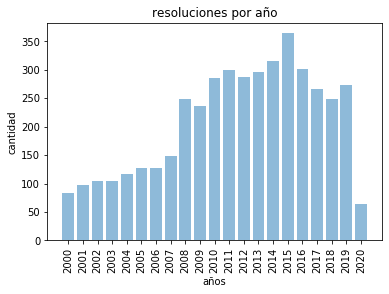

In [22]:
#Resoluciones por año
resoaño=df.groupby(["año"])["Resumen"].count()
plt.bar(resoaño.index,resoaño, align='center', alpha=0.5)
plt.xticks(resoaño.index, rotation="vertical")
plt.ylabel('cantidad')
plt.xlabel('años')
plt.title('resoluciones por año')
plt.show()

# Ajustando parámetros y análisis de datos


In [493]:
df=pd.read_excel('guat.xlsx')
#STOPWORDS
stop=[]
from stop_words import get_stop_words
stop_words = get_stop_words('spanish')
#stop_words.append()

#numero de topicos óptimo
#num_topics=10

#año
año=2020

#nombre
nombre=f"guat{año}.html"

In [494]:
df=df[df["año"]==año]

In [495]:
df

,Resolución,Fecha,Resumen,link de pagina,año
4065,038-2020,2020-02-06 00:00:00,Se establece la metodología a utilizar por el ...,http://www.cnee.gob.gt/wp/?page_id=4883&page=2,2020
4066,030-2020,2020-01-29 00:00:00,"La Empresa Eléctrica de Gualán, presentó para ...",http://www.cnee.gob.gt/wp/?page_id=4883&page=2,2020
4067,044-2020,2020-02-27 00:00:00,La Empresa Eléctrica Municipal de Puerto Barri...,http://www.cnee.gob.gt/wp/?page_id=4883&page=2,2020
4068,021-2020,2020-01-28 00:00:00,La Empresa Eléctrica Municipal de Santa Eulali...,http://www.cnee.gob.gt/wp/?page_id=4883&page=3,2020
4069,037-2020,2020-02-06 00:00:00,Se emiten las adiciones las Normas Técnicas de...,http://www.cnee.gob.gt/wp/?page_id=4883&page=2,2020
...,...,...,...,...,...
4124,064-2020,2020-03-24 00:00:00,"Se aprueban los Términos de Referencia, conten...",http://www.cnee.gob.gt/wp/?page_id=4883&page=1,2020
4125,055-2020,2020-03-24 00:00:00,"La Empresa Municipal Rural de Electricidad, pr...",http://www.cnee.gob.gt/wp/?page_id=4883&page=1,2020
4126,046-2020,2020-02-27 00:00:00,Determinar como parte del Sistema Principal la...,http://www.cnee.gob.gt/wp/?page_id=4883&page=2,2020
4127,034-2020,2020-01-29 00:00:00,"Distribuidora de Electricidad de Oriente, Soci...",http://www.cnee.gob.gt/wp/?page_id=4883&page=2,2020


## Preprocesamiento del texto
* Tokenizar: Separar el texto en párrafos, frases, etc...
* Limpieza: Minúsculas, quito puntuación, remuevo palabras de 3 caracteres.
* Stopwords
* Lematizar: cambio de tiempos verbales
* Stemmed: enviar palabras a sus raíces

In [496]:
df.Resumen=df.Resumen.apply(str)
df.Resumen=df.Resumen.str.lower() 
#data2.Resumen=data2.Resumen.str.replace('[,\.!?\-!?\n\)\(\r]', ' ') 
df.Resumen=df.Resumen.str.replace('[0-9]', ' ') 
df.Resumen=df.Resumen.str.replace('reuters', '')
df.Resumen=df.Resumen.str.replace('regulación', '')
df.Resumen=df.Resumen.str.replace('resolución', '')
df.Resumen=df.Resumen.str.replace('factores', '')
df.Resumen=df.Resumen.str.replace('  +', ' ')
df.Resumen=df.Resumen.str.replace('said', '')
df.Resumen=df.Resumen.str.replace('dominicana', '') 
df.Resumen=df.Resumen.str.replace('republica', '') 
df.Resumen=df.Resumen.str.replace("usuarios", "usuario")
df.Resumen=df.Resumen.str.replace("ede", "")
df.Resumen=df.Resumen.str.replace("creg", "")
df.Resumen=df.Resumen.str.replace("resoluciones", "")
df.Resumen=df.Resumen.str.replace("resoluciones", "")
df.Resumen=df.Resumen.str.replace("trilogy", "")
df.Resumen=df.Resumen.str.replace("mhz", "")
df.Resumen=df.Resumen.str.replace("dgt", "")
df.Resumen=df.Resumen.str.replace("favor", "")
df.Resumen=df.Resumen.str.replace("por la cual", "")
df.Resumen=df.Resumen.str.replace("jd", "")
df.Resumen=df.Resumen.str.replace("mayo", "")

In [497]:
df

,Resolución,Fecha,Resumen,link de pagina,año
4065,038-2020,2020-02-06 00:00:00,se establece la metodología a utilizar por el ...,http://www.cnee.gob.gt/wp/?page_id=4883&page=2,2020
4066,030-2020,2020-01-29 00:00:00,"la empresa eléctrica de gualán, presentó para ...",http://www.cnee.gob.gt/wp/?page_id=4883&page=2,2020
4067,044-2020,2020-02-27 00:00:00,la empresa eléctrica municipal de puerto barri...,http://www.cnee.gob.gt/wp/?page_id=4883&page=2,2020
4068,021-2020,2020-01-28 00:00:00,la empresa eléctrica municipal de santa eulali...,http://www.cnee.gob.gt/wp/?page_id=4883&page=3,2020
4069,037-2020,2020-02-06 00:00:00,se emiten las adiciones las normas técnicas de...,http://www.cnee.gob.gt/wp/?page_id=4883&page=2,2020
...,...,...,...,...,...
4124,064-2020,2020-03-24 00:00:00,"se aprueban los términos de referencia, conten...",http://www.cnee.gob.gt/wp/?page_id=4883&page=1,2020
4125,055-2020,2020-03-24 00:00:00,"la empresa municipal rural de electricidad, pr...",http://www.cnee.gob.gt/wp/?page_id=4883&page=1,2020
4126,046-2020,2020-02-27 00:00:00,determinar como parte del sistema principal la...,http://www.cnee.gob.gt/wp/?page_id=4883&page=2,2020
4127,034-2020,2020-01-29 00:00:00,"distribuidora de electricidad de oriente, soci...",http://www.cnee.gob.gt/wp/?page_id=4883&page=2,2020


In [498]:
# Ahora construiremos la matriz término-documento
n_vocab=1500 # máximo tamaño de vocabulario
tf_vectorizer = CountVectorizer(max_df=0.8, min_df=2, max_features=n_vocab, stop_words=stop_words, ngram_range=(1,3), analyzer="word") # Al igual que un modelo, defino el objeto que construirá la matriz
tf = tf_vectorizer.fit_transform(df.Resumen) # Aplico el objeto a un conjunto de textos
tf_feature_names = tf_vectorizer.get_feature_names() # Veo el vocabulario
tf = tf_vectorizer.fit_transform(df.Resumen.head(100)) # Aplico el objeto a un conjunto de texto

In [499]:
tf_feature_names = tf_vectorizer.get_feature_names() # Veo el vocabulario

In [500]:
TF_detallada=pd.DataFrame(csr_matrix(tf).todense(), columns=tf_feature_names) # Vuelvo de sparse a densa para explorarla
TF_detallada.head() #Veo las primeras 5 filas
#print(TF_detallada.shape) # Veo las dimensiones, a qué corresponden?

,abierta,abierta eegsa,abierta energuate,abril,adjudicación,adjudicación realizada,adjudicación realizada junta,ajuste,ajuste tarifario,ajuste tarifario usuario,...,términos referencia contenidos,usuario,usuario servicio,usuario servicio distribución,usuario tarifa,usuario tarifa social,valor,zacapa,zacapa presentó,zacapa presentó aprobación
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,1,0,0,0,0
2,0,0,0,0,0,0,0,1,1,1,...,0,1,0,0,1,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [501]:
# ¿Que tal si estudiamos las frecuencias de las palabras?
#frecuencias=pd.DataFrame(TF_detallada.sum(), index=tf_feature_names, columns=['Freq'])
#frecuencias.sort_values(by=['Freq'], ascending=False, inplace=True)
#frecuencias.head(15)
#frecuencias.head(30).plot(kind='bar', figsize=(12,6))

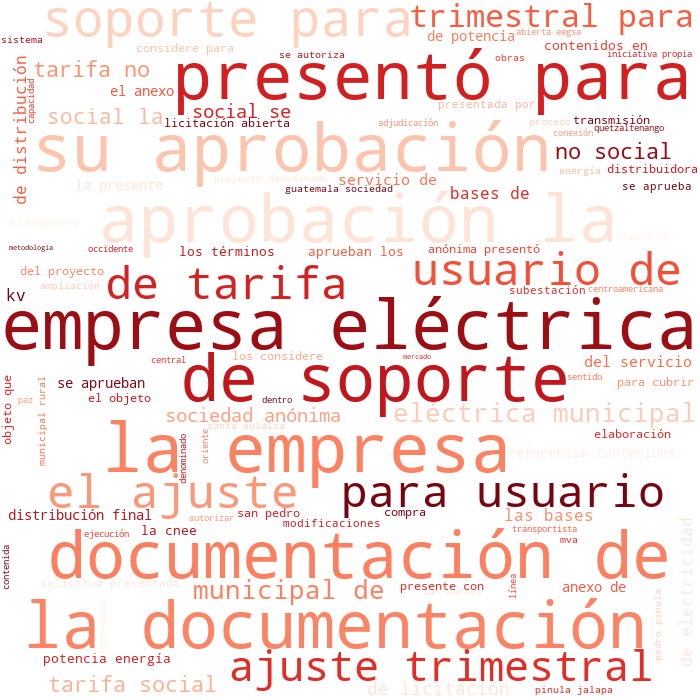

In [502]:
cloud=WordCloud(background_color='white', width=700, height=700, max_words=100, max_font_size=300, stopwords=tf_vectorizer.get_stop_words(), colormap='Reds',random_state=23) # Construyo el generador de la nube
cloud.generate('.'.join(list(df.Resumen))) # Genero la nube
cloud.to_image() # Despliego la imagen de la nube
# Para ver las gamas de colores vea: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
# Para ver más parámetros de la nube de palabras: https://amueller.github.io/word_cloud/auto_examples/index.html#example-gallery

# MODELO GENERAL - TODOS LOS AÑOS

In [509]:
num_topics=8

In [510]:
# Cuántos tópicos deseo
lda = LatentDirichletAllocation(n_components=num_topics, max_iter=10,doc_topic_prior=0.1, topic_word_prior=0.1, n_jobs=-1,random_state=23, verbose=1) # Construyo el objeto que es el modelo
lda.fit(tf) # Estimo el LDA
#print(lda.components_.shape) # De que tma~no es el resultado?
#lda.components_ # Exploremos el resultado

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


LatentDirichletAllocation(batch_size=128, doc_topic_prior=0.1,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=8, n_jobs=-1,
                          perp_tol=0.1, random_state=23, topic_word_prior=0.1,
                          total_samples=1000000.0, verbose=1)

In [511]:
print_topics(lda, tf_vectorizer, 15) # Veo las 15 palabras más importantes de cada tópico


Topic #0:
obras, transmisión, anual, determinar, valor, ejecución, modifica, emiten, indicado, metodología, anexo, servicio, sistema, cnee, eléctrica patulul presentó

Topic #1:
eléctrica, servicio, energía, distribución, servicio distribución, final, presente, distribución final, servicio distribución final, anexo presente, contenidos, contenidos anexo, aprueban términos referencia, aprueban términos, referencia contenidos

Topic #2:
kv, kv mva, mva, proyecto denominado, subestación, denominado, proyecto, sistema, sociedad anónima, sociedad, anónima, autoriza, propia proyecto, propia, iniciativa

Topic #3:
ajuste trimestral usuario, trimestral, ajuste trimestral, soporte ajuste trimestral, trimestral usuario tarifa, trimestral usuario, usuario, tarifa, tarifa social, social, aprobación documentación soporte, documentación soporte ajuste, usuario tarifa, presentó, soporte

Topic #4:
empresa eléctrica, documentación soporte, presentó aprobación, presentó aprobación documentación, sopor

## Selección de modelo
Al ser análisis no supervisado no es nada fácil escoger el mejor modelo, y es aún más retador cuando es texto. Tenemos una aproximación, la máxima verosimilitud

Wall time: 7.34 s


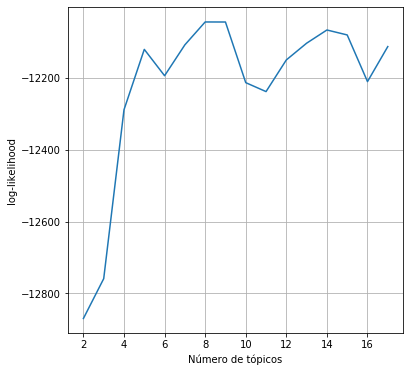

In [512]:
%%time
# Juguemos con un hiper parámetro
likelihood=[]
values=[i for i in range(2,18,1)]
for i in values:
    modelo = LatentDirichletAllocation(n_components=i, max_iter=10,doc_topic_prior=0.1, topic_word_prior=0.1, n_jobs=-1,random_state=23) # Construyo el objeto que es el modelo
    modelo.fit(tf)
    likelihood.append(modelo.score(tf))
# Visualizamos
plt.figure(figsize=(6,6))
plt.plot(values, likelihood)
plt.xlabel('Número de tópicos')
plt.ylabel('log-likelihood')
plt.grid()

## Visualización del LDA

In [513]:
LDAvis_prepared=sklearnlda.prepare(lda, tf, tf_vectorizer ) # Preparo el modelo y sus resultados para la visualización
pyLDAvis.save_html(LDAvis_prepared, nombre) # Guardo la visualización como html"""

In [514]:
pyLDAvis.display(LDAvis_prepared) # Lo visualizo dentro del notebook